In [14]:
from PIL import Image
import torch
import torchvision.transforms.functional as tfun

path = 'camera_04a287849657478ea774727e5bff5202_office_3_frame_equirectangular_domain_rgb.png'
image = Image.open(path).resize((256,128))
x = tfun.to_tensor(image)
x.unsqueeze_(0)
x_T = x[:,:3,:,:]
print(x_T.shape)

torch.Size([1, 3, 128, 256])


In [29]:
from spherenet import SphereConv2D, SphereMaxPool2D

conv1 = SphereConv2D(3, 16, stride=1)
conv2 = SphereConv2D(16, 32, stride=1)
pool1 = SphereMaxPool2D(stride=2)

x = x_T
#x = torch.randn(1, 1, 60, 60)  # (batch, channel, height, weight)
x = conv1(x) # (1, 32, 60, 60)
x = conv2(x) # (1, 32, 60, 60)
x = pool1(x) # (1, 32, 30, 30)
x = x.detach().numpy()
x.shape

(1, 32, 64, 128)

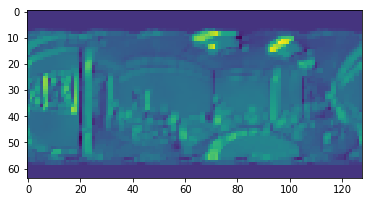

In [34]:
import matplotlib.pyplot as plt

for k in range(1):
    plt.imshow(x[0,k,:,:])
    plt.show()

In [32]:
import torch.nn as nn
import torch.nn.functional as F

x2 = x_T
conv1_norm = nn.Conv2d(3, 16, 1) # (channel, out channels, square conv)
conv2_norm = nn.Conv2d(16, 32, 1) # (channel, out channels, square conv)
x2 = conv1_norm(x2)
x2 = conv2_norm(x2)
x2 = F.max_pool2d(x2, (2, 2))
x2 = x2.detach().numpy()
x2.shape

(1, 32, 64, 128)

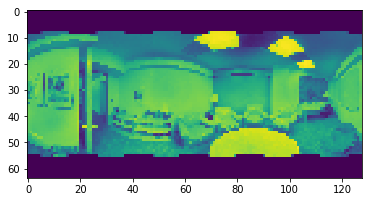

In [33]:
for k in range(1):
    plt.imshow(x2[0,k,:,:])
    plt.show()